In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
df=pd.read_csv("heart.csv")
print(df.head())#checks first five rows of the data
df.info()
df.isnull().sum()

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

DATA FRAME

In [405]:
# Check for missing values
print(df.head())

print("Missing values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows:")
print(df.duplicated().sum())

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)
print("\nShape after dropping duplicates:", df.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplicate rows:
723

Shape after dropping duplicates: (302, 14)


In [406]:
print(df.head())
cols=[df.columns]



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


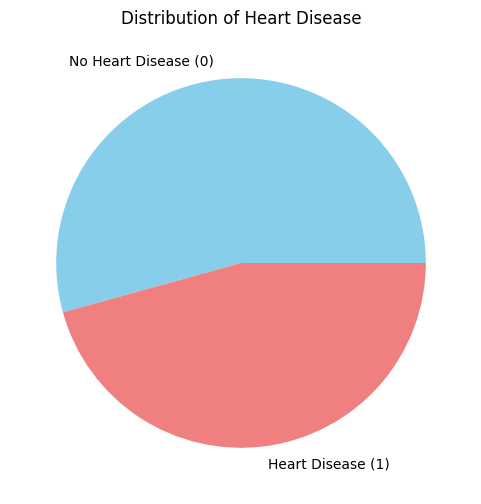

In [407]:
# Pie chart for the 'target' column
target_counts = df['target'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=['No Heart Disease (0)', 'Heart Disease (1)'], colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Heart Disease')
plt.show()



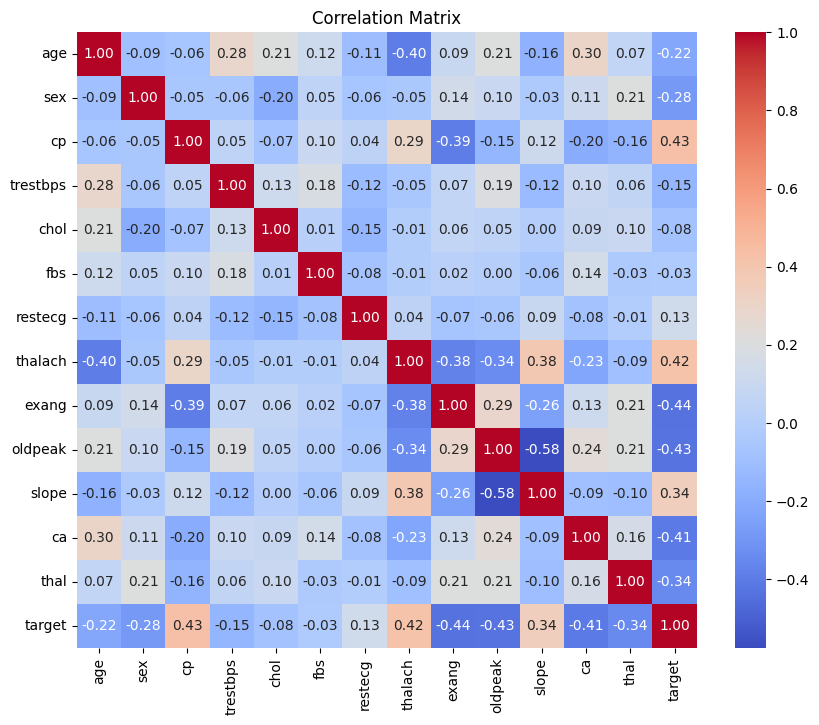


Correlation Matrix:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [408]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8)) # Increased figure size
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm') # Added fmt='.2f' for better formatting of annotations
plt.title('Correlation Matrix')
plt.show()

print("\nCorrelation Matrix:")
display(correlation_matrix)

In [409]:
train, valid, test = np.split(df.sample(frac=1,random_state=42), [int(0.6*len(df)), int(0.8*len(df))])


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [410]:


def scale_dataset(dataframe,oversample=False):
  X = dataframe[dataframe.columns[:-1]].values#all column values except last column stored in 2d array
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)#apply standard scaler to x and then transform x
  import pickle

  with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
  if oversample:
    ros = RandomOverSampler(random_state=42)
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))#stack as 1d array x and y both

  return data, X, y

In [411]:
#print(len(train[train['target']==1]))
#print(len(train[train['target']==0]))

In [412]:

train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)
len(y_train)


196

In [413]:
sum(y_train ==1)


np.int64(98)

In [414]:
sum(y_train ==0)

np.int64(98)

KNN IMPLEMENTATION

In [415]:
from sklearn.neighbors import KNeighborsClassifier#using knn package
from sklearn.metrics import classification_report

In [416]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [417]:
y_pred = knn_model.predict(X_test)

In [418]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        27
           1       0.80      0.82      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



NAIVE BAYES

In [419]:
from sklearn.naive_bayes import GaussianNB

In [420]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [421]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.82      0.82      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



LOGISTIC REGRESSION

In [422]:
from sklearn.linear_model import LogisticRegression

In [423]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [424]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        27
           1       0.81      0.76      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [425]:
from sklearn.svm import SVC

In [426]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [427]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        27
           1       0.80      0.82      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [428]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [429]:
# -----  Get predictions from your 4 trained models -----

pred1 = knn_model.predict(X_valid)
pred2 = nb_model.predict(X_valid)
pred3 = lg_model .predict(X_valid)
pred4 = svm_model.predict(X_valid)

# ----- Create meta-features (stack predictions) -----

meta_X = np.column_stack([pred1, pred2, pred3, pred4])

# ----- Train meta-learner on these predictions -----
meta_model = LogisticRegression(random_state= 42)
meta_model.fit(meta_X, y_valid)   # using validation set as "training" for meta-model

# ----- Evaluate meta-learner -----
meta_preds = meta_model.predict(meta_X)
acc = accuracy_score(y_valid, meta_preds)
print("Stacked Model Accuracy:", acc)

Stacked Model Accuracy: 0.7666666666666667


In [430]:
test_preds = np.column_stack([
    knn_model.predict(X_test),
    lg_model.predict(X_test),
    svm_model.predict(X_test),
    nb_model.predict(X_test)
])

# Final stacked prediction
stacked_preds = meta_model.predict(test_preds)

# ---- Step 4: Print classification report ----
print("Stacking Ensemble Classification Report:\n")
print(classification_report(y_test, stacked_preds))

Stacking Ensemble Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [431]:
import pickle
from sklearn.preprocessing import StandardScaler

# Save stacking model

with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn_model, f)
with open("nb_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)
with open("lg_model.pkl", "wb") as f:
    pickle.dump(lg_model, f)
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)
    
with open("stacking_model.pkl", "wb") as f:
    pickle.dump(meta_model, f)

print("Model and scaler saved successfully!")



Model and scaler saved successfully!
